# Novel-taxa and simulated community generation

This notebook describes the generation of reference databases for both novel-taxa and simulated community analyses. Novel-taxa analysis is a form of cross-validated taxonomic classification, wherein random unique sequences are sampled from the reference database as a test set; all sequences sharing taxonomic affiliation at a given taxonomic level are removed from the reference database (training set); and taxonomy is assigned to the query sequences at the given taxonomic level. Thus, this test interrogates the behavior of a taxonomy classifier when challenged with "novel" sequences that are not represented by close matches within the reference sequence database. Such an analysis is performed to assess the degree to which "overassignment" occurs for sequences that are not represented in a reference database.

Simulated community analysis represents more conventional cross-validated classification, wherein unique sequences are randomly sampled from a reference dataset and used as a test set for taxonomic classification, using a training set that has those sequences removed, but not other sequences that share taxonomic affiliation. Instead, the training set must contain identical taxonomies to those represented by the test sequences.

# Novel-taxa reference data set generation

This section describes the preparation of the data sets necessary for "novel taxa" analysis. The goals of this step are:
1. Create a "clean" reference database that can be used for evaluation of "novel taxa" from phylum to species level.
2. Generate simulated amplicons and randomly subsample query sequences to use as "novel taxa"
3. Create modified sequence reference databases for taxonomic classification of "novel taxa" sequences

In this first cell, we describe data set/database characteristics as a dictionary: dataset name is the key, with values reference sequence fasta, taxonomy, database name, forward primer sequence, reverse primer sequence, forward primer name, reverse primer name.

MODIFY these values to generate novel-taxa files on a new reference database

In [1]:
from tax_credit.framework_functions import \
    generate_simulated_datasets, distance_comparison, \
    test_cross_validated_sequences, \
    test_novel_taxa_datasets

from os.path import expandvars, join
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
project_dir = expandvars("../../../tax-credit-data-bk")
data_dir = join(project_dir, "data")

# List databases as fasta/taxonomy file pairs
databases = {'FL-REF': [join(data_dir, 'ref_dbs/gg_13_8_otus/99_otus.fasta'), 
             join(data_dir, 'ref_dbs/gg_13_8_otus/99_otu_taxonomy.txt'),
             "gg_13_8_otus", "AGAGTTTGATCMTGGCTCAG", "TACGGYTACCTTGTTACGACTT", "27f", "1492r"],
             'V1-REF': [join(data_dir, 'ref_dbs/gg_13_8_otus/99_otus.fasta'), 
             join(data_dir, 'ref_dbs/gg_13_8_otus/99_otu_taxonomy.txt'),
             "gg_13_8_otus", "CAGGCCTAACACATGCAAGTC", "GTATTACCGCGGCAGCTGGCAC", "63f", "519r"]
            }
# databases = {'B1-REF-FL': ['../../data/ref_dbs/gg_13_8_otus/99_otus.fasta', 
#              '../../data/ref_dbs/gg_13_8_otus/99_otu_taxonomy.txt',
#              "gg_13_8_otus", "AGAGTTTGATCMTGGCTCAG", "TACGGYTACCTTGTTACGACTT", "27f", "1492r"],
#              'F1-REF-FL': ['../../data/ref_dbs/unite_20.11.2016/sh_refs_qiime_ver7_99_20.11.2016_dev.fasta', 
#              '../../data/ref_dbs/unite_20.11.2016/sh_taxonomy_qiime_ver7_99_20.11.2016_dev.txt', 
#              "unite_20.11.2016", "ACCTGCGGARGGATCA", "TCCTCCGCTTATTGATATGC", "BITSf", "ITS4r"]
#             }

Now we will import these to a dataframe and view it. You should not need to modify the following cell.

In [4]:
# Arrange data set / database info in data frame
simulated_community_definitions = pd.DataFrame.from_dict(databases, orient="index")
simulated_community_definitions.columns = ["Reference file path", "Reference tax path", "Reference id", 
                                           "Fwd primer", "Rev primer", "Fwd primer id", "Rev primer id"]
simulated_community_definitions

,Reference file path,Reference tax path,Reference id,Fwd primer,Rev primer,Fwd primer id,Rev primer id
FL-REF,../../../tax-credit-data-bk/data/ref_dbs/gg_13...,../../../tax-credit-data-bk/data/ref_dbs/gg_13...,gg_13_8_otus,AGAGTTTGATCMTGGCTCAG,TACGGYTACCTTGTTACGACTT,27f,1492r
V1-REF,../../../tax-credit-data-bk/data/ref_dbs/gg_13...,../../../tax-credit-data-bk/data/ref_dbs/gg_13...,gg_13_8_otus,CAGGCCTAACACATGCAAGTC,GTATTACCGCGGCAGCTGGCAC,63f,519r


Generate "clean" reference taxonomy and sequence database by removing taxonomy strings with empty or ambiguous levels'

Set simulated community parameters, including amplicon length and the number of iterations to perform. Iterations will split our query sequence files into N chunks.

This will take a few minutes to run. Get some coffee.

In [5]:
read_length = 250
iterations = 10
min_read_length = 80
generate_simulated_datasets(simulated_community_definitions, data_dir, 
                            read_length, iterations, min_read_length=min_read_length,
                            levelrange=range(6, 1, -1), force=True)

FL-REF Sequence Counts
Raw Fasta:            203452.0
Clean Fasta:          20745.0
Simulated Reads:      4528.0
FL-REF: generating 10 folds on 190 strata
V1-REF Sequence Counts
Raw Fasta:            203452.0
Clean Fasta:          20745.0
Simulated Reads:      17274.0
V1-REF: generating 10 folds on 408 strata


### Data Leakage
First check that train/train and train/test distances are similarly distributed for the cross validation data sets.

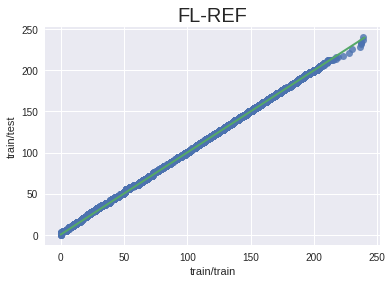

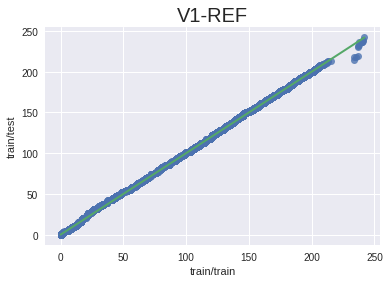

In [6]:
distance_comparison(simulated_community_definitions, data_dir, 'cross-validated')

Now check that the novel taxa distance distributions are ok.

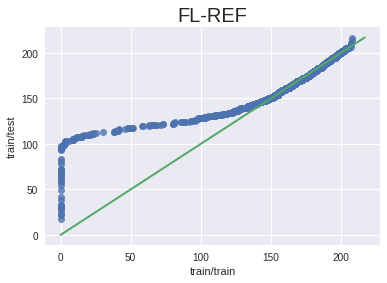

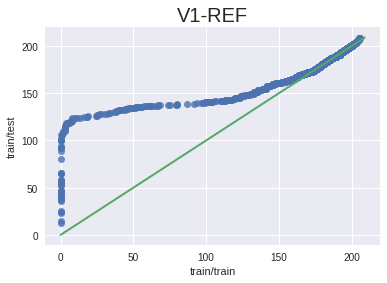

In [7]:
distance_comparison(simulated_community_definitions, data_dir, 'novel-taxa-simulations', samples=100)

For peace of mind, we can test our novel taxa and simulated community datasets to confirm that:

1) For simulated communities, test (query) taxa IDs are not in training (ref) set, but all taxonomy strings are

2) For novel taxa, test taxa IDs and taxonomies are not in training (ref) set, but sister branch taxa are

If no errors print, all tests pass.

In [8]:
test_cross_validated_sequences(data_dir)

As a sanity check, confirm that novel taxa were generated successfully.

In [9]:
test_novel_taxa_datasets(data_dir)